In [1]:
# PURPOSE OF EDA 
# Explore the potential of restaurant data for extraploting predicaitons of a restaurants star rating.  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# Import in only those rows from Yelps business.json file than have: 
# 1. 'AZ' as the state  
# 2. 'restuarant' in the string for category
business = pd.read_csv('./business_az_r.csv')

In [4]:
# check the shape
business.shape

(11473, 14)

In [5]:
# check the head
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016.0,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."


In [6]:
# INITIAL DATA CLEAN

In [7]:
# check data types
business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code     float64
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [8]:
# check for null values
business.isnull().sum()

business_id        0
name               0
address          134
city               0
state              0
postal_code       13
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       259
categories         0
hours           2589
dtype: int64

In [9]:
# check for zero values
business.astype(bool).sum(axis=0)

business_id     11473
name            11473
address         11473
city            11473
state           11473
postal_code     11473
latitude        11473
longitude       11473
stars           11473
review_count    11473
is_open          7680
attributes      11473
categories      11473
hours           11473
dtype: int64

In [10]:
# Turn post_code from a float into a string and make a it a new column and fill nan as 0
business['postal_code_str'] = business.postal_code.astype(str)
business['postal_code_str'] = business['postal_code_str'].map(lambda x: x.rstrip('.0'))
business['postal_code_str'].fillna(0, inplace=True)

In [11]:
# OVERVIEW OF STAR RATINGS 

In [12]:
# Reminder on stars 
print(business.stars.min())
print(business.stars.max())
print(business.stars.min()+ business.stars.max() / 2)

1.0
5.0
3.5


In [13]:
# Average star ratings of businesses skew slightly lower
print(business.stars.mean())
print(business.stars.std())

3.437418286411575
0.8146029447558664


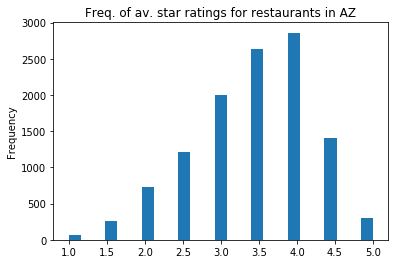

In [14]:
# Skew can be seen graphically
business.stars.plot(kind='hist', bins=25, title= 'Freq. of av. star ratings for restaurants in AZ');

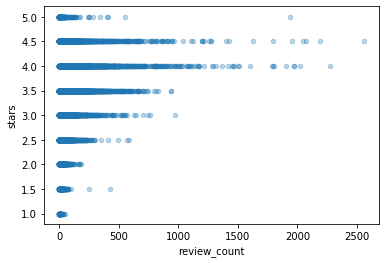

In [15]:
# To just above the mean star ratings, in general restaurants that have higher star ratings tend to have received more reviews
business.plot(kind='scatter', x='review_count', y='stars', alpha=0.3);

In [16]:
# CORRELATION BETWEEN REVIEW COUNT FOR A BUSINESS AND AVERAGE RATING 

In [17]:
# total number of reviews
business.review_count.sum()

1147664

In [18]:
# Get data description of review count 
business.review_count.describe()

count    11473.000000
mean       100.031727
std        165.937579
min          3.000000
25%         13.000000
50%         40.000000
75%        118.000000
max       2556.000000
Name: review_count, dtype: float64

In [19]:
# Creeate a dataframe to map the freq and ratings of different values of total reviews for businesses
business_review_count = pd.concat([business.review_count.value_counts(), business.groupby('review_count').stars.mean()], axis=1)
business_review_count.reset_index(level=0, inplace=True)
business_review_count.columns = ['review_count_for_biz', 'freq_of_businesses', 'average_rating']
business_review_count

,review_count_for_biz,freq_of_businesses,average_rating
0,3,480,3.367708
1,4,366,3.312842
2,5,307,3.389251
3,6,277,3.310469
4,7,265,3.241509
...,...,...,...
738,2046,1,4.500000
739,2071,1,4.500000
740,2189,1,4.500000
741,2276,1,4.000000


In [20]:
# Check for correlation between review count and aveage rating
business_review_count.corr()

,review_count_for_biz,freq_of_businesses,average_rating
review_count_for_biz,1.000000,-0.364270,0.530366
freq_of_businesses,-0.364270,1.000000,-0.438805
average_rating,0.530366,-0.438805,1.000000


Text(0.5, 1, 'Correlation between av. review count for locations with the same # of reviews')

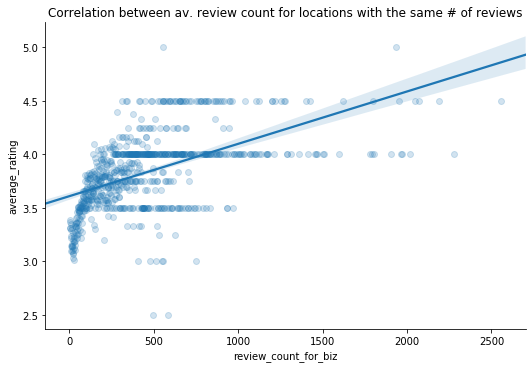

In [21]:
# map the correlation between review count and average rating
sns.lmplot(x='review_count_for_biz', y='average_rating', data=business_review_count, aspect=1.5, scatter_kws={'alpha':0.2});
ax = plt.gca()
ax.set_title('Correlation between av. review count for locations with the same # of reviews')

Text(0.5, 1, 'Correlation between av. review count < 250 and average rating for locations with the same # of reviews')

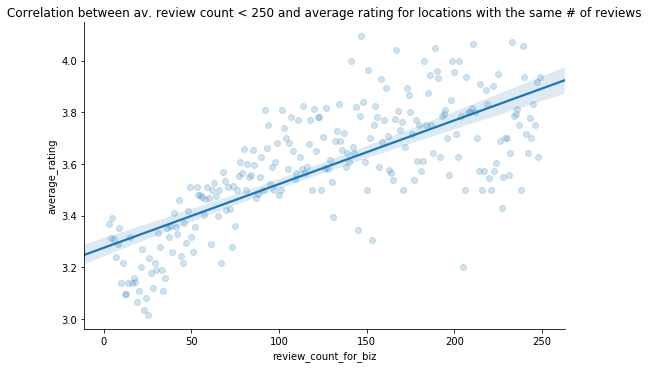

In [22]:
# # Check for correlation between review count and average rating when only businesses that have 250 or less total reviews are plotted.
business_review_count_less_than_250 = business_review_count[business_review_count.review_count_for_biz < 250]
sns.lmplot(x='review_count_for_biz', y='average_rating', data=business_review_count_less_than_250, aspect=1.5, scatter_kws={'alpha':0.2});
ax = plt.gca()
ax.set_title('Correlation between av. review count < 250 and average rating for locations with the same # of reviews')

In [23]:
# See strong correlation between average rating and review count
business_review_count_less_than_250.corr()

,review_count_for_biz,freq_of_businesses,average_rating
review_count_for_biz,1.000000,-0.664713,0.740740
freq_of_businesses,-0.664713,1.000000,-0.586419
average_rating,0.740740,-0.586419,1.000000


In [24]:
# RESTAURANTS IN AZ WITH MORE THAN ONE LOCATION 

In [25]:
# Pulling together data set on multi location restaurants
business_name = pd.concat([business.name.value_counts(),business.groupby('name').stars.mean()], axis=1)
business_name.reset_index(level=0, inplace=True)
business_name.columns = ['name', 'number_of_locations', 'average_rating']
business_rating_total = business.groupby('name')['review_count'].sum().to_frame()
business_rating_total.reset_index(inplace = True)
del business_rating_total['name']
business_name_revised = pd.concat([business_name, business_rating_total], axis=1)
business_name_revised.head(1)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,name,number_of_locations,average_rating,review_count
0,#1 Fried Rice,1,3.5,44


In [26]:
# 88% of businesses have only one location
business_name_revised.number_of_locations.value_counts(normalize=True).head(10)

1     0.882804
2     0.060378
3     0.019715
4     0.009858
5     0.005340
6     0.003697
7     0.002601
8     0.001506
10    0.001506
11    0.000958
Name: number_of_locations, dtype: float64

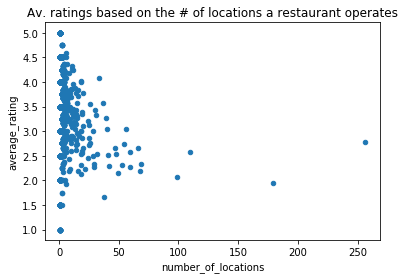

In [27]:
# Shows wide variety of ratings for restuarants that have only one location
# sns.lmplot(x='freq_of_name', y='average_rating', data=business_name, aspect=1.5, scatter_kws={'alpha':0.2});
business_name.plot(kind='scatter', x='number_of_locations', y='average_rating', title = 'Av. ratings based on the # of locations a restaurant operates')

In [28]:
# Average rating for restaurants sorted by those with the most locations
business_name_revised.sort_values('number_of_locations', ascending=False).head(30)

,name,number_of_locations,average_rating,review_count
5844,Subway,256,2.771484,2436
3876,McDonald's,179,1.941341,4667
5997,Taco Bell,110,2.572727,2009
858,Burger King,99,2.060606,1381
4513,Panda Express,69,2.326087,2262
4820,Pizza Hut,68,2.198529,1150
2110,Filiberto's Mexican Food,66,2.651515,2373
1731,Domino's Pizza,59,2.584746,1280
7035,Wendy's,59,2.262712,1363
1267,Chipotle Mexican Grill,56,3.035714,3668


In [29]:
business_name_revised['averege_reviews_location'] =  business_name_revised['review_count']/business_name_revised['number_of_locations']

In [30]:
# OPEN / CLOSED

In [31]:
# Check for the number of restaurants that are open
print(business.is_open.value_counts(normalize=True))
print('33% of restuarants are no longer open')

1    0.669398
0    0.330602
Name: is_open, dtype: float64
33% of restuarants are no longer open


In [32]:
# see if open and closed restaurants have different average review count and stars
open_closed = business.groupby('is_open').review_count.agg(['count', 'sum'])
open_closed.reset_index(inplace = True)
open_closed.columns = ['is_open', 'count', 'review_count']
open_closed['av_review_count'] = open_closed['review_count']/open_closed['count']
open_closed = open_closed.merge(business.groupby('is_open').stars.sum(), on='is_open', how='left')
open_closed['av_stars'] = open_closed['stars']/open_closed['count']
open_closed

,is_open,count,review_count,av_review_count,stars,av_stars
0,0,3793,171352,45.175850,12998.0,3.426839
1,1,7680,976312,127.123958,26439.5,3.442643


In [33]:
# the group of restaurants that are open have in aggregate c.3x as many reviews as those that are closed
# but the aggregate rating is close to identifcal betwen restaurants that are open and those that are closed

In [34]:
# Calculate baseline is close to the prediction using logistical regression
business['is_open'].value_counts().iloc[0] / len(business)

0.6693977163775822

In [35]:
# correlate is_open to review_count using logistical regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LR = LogisticRegression()
feature_cols = ['review_count']
X = business[feature_cols]
y = business.is_open

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6744510282328338

In [36]:
# Calculate accuracy using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=62)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [37]:
# accuracy rate for KNN model 
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6849076333217149


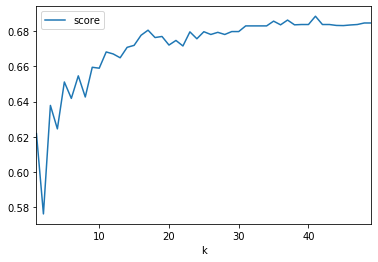

In [38]:
# search for optimal neighbor count for KNN

scores = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])
    
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [39]:
# Now use a neural network

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import pandas as pd

%matplotlib inline

Using TensorFlow backend.
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hanhuang/opt/anaconda3/lib/p

In [40]:
feature_cols = ['review_count']
X = business[feature_cols]
y = business.is_open

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

n_input = X_train.shape[1]
n_input


model = Sequential()
model.add(Dense(18, input_dim = n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Dense(18, input_dim = n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit it
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=None,
    verbose=2
)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 8604 samples, validate on 2869 samples
Epoch 1/100
 - 0s - loss: 0.6318 - acc: 0.6514 - val_loss: 0.5980 - val_acc: 0.6685
Epoch 2/100
 - 0s - loss: 0.5843 - acc: 0.6697 - val_loss: 0.5931 - val_acc: 0.6685
Epoch 3/100
 - 0s - loss: 0.5806 - acc: 0.6697 - val_loss: 0.5938 - val_acc: 0.6685
Epoch 4/100
 - 0s - loss: 0.5801 - acc: 0.6699 - val_loss: 0.5938 - val_acc: 0.6685
Epoch 5/100
 - 0s - loss: 0.5798 - acc: 0.6697 - val_loss: 0.5942 - val_acc: 0.6685
Epoch 6/100
 - 0s - loss: 0.5795 - acc: 0.6710 - val_loss: 0.5938 - val_acc: 0.6685
Epoch 7/100
 - 0s - loss: 0.5795 - acc: 0.6697 - val_loss: 0.5934 - val_acc: 0.6685
Epoch 8/100
 - 0s - loss: 0.5791 - acc: 0.6757 - val_loss: 0.5942 - val_acc: 0.6860
Epoch 9/100
 - 0s - loss: 0.5791 - acc: 0.6735 - val_loss: 0.5937 - val_acc: 0.6685
Epoch 10/100
 - 0s - loss: 0.5791 - acc: 0.6717 - val_loss: 0.5931 - val_acc

 - 0s - loss: 0.5759 - acc: 0.6915 - val_loss: 0.5915 - val_acc: 0.6769
Epoch 91/100
 - 0s - loss: 0.5758 - acc: 0.6898 - val_loss: 0.5914 - val_acc: 0.6769
Epoch 92/100
 - 0s - loss: 0.5761 - acc: 0.6890 - val_loss: 0.5896 - val_acc: 0.6828
Epoch 93/100
 - 0s - loss: 0.5758 - acc: 0.6910 - val_loss: 0.5897 - val_acc: 0.6828
Epoch 94/100
 - 0s - loss: 0.5759 - acc: 0.6897 - val_loss: 0.5898 - val_acc: 0.6856
Epoch 95/100
 - 0s - loss: 0.5755 - acc: 0.6912 - val_loss: 0.5916 - val_acc: 0.6710
Epoch 96/100
 - 0s - loss: 0.5761 - acc: 0.6876 - val_loss: 0.5896 - val_acc: 0.6828
Epoch 97/100
 - 0s - loss: 0.5756 - acc: 0.6901 - val_loss: 0.5909 - val_acc: 0.6828
Epoch 98/100
 - 0s - loss: 0.5760 - acc: 0.6898 - val_loss: 0.5904 - val_acc: 0.6828
Epoch 99/100
 - 0s - loss: 0.5758 - acc: 0.6892 - val_loss: 0.5894 - val_acc: 0.6856
Epoch 100/100
 - 0s - loss: 0.5759 - acc: 0.6891 - val_loss: 0.5895 - val_acc: 0.6884


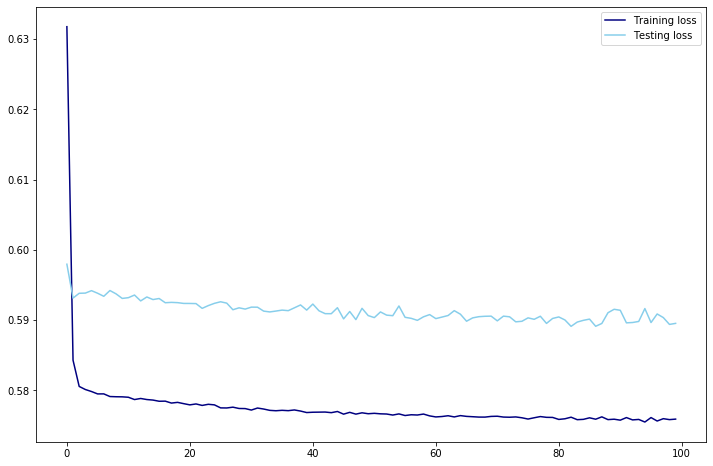

In [42]:
# Look, Ma, the machine is learning!
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [43]:
# ZIP

In [44]:
business['postal_code_str']

0        85016
1        85032
2        85007
3        85225
4        85286
         ...  
11468    85383
11469    85281
11470    85234
11471    85215
11472    85051
Name: postal_code_str, Length: 11473, dtype: object

In [45]:
# Create a dataframe for postal_code_str and the mean for 'stars'
zip_stars = pd.DataFrame(business.groupby('postal_code_str').stars.mean().round(2))
zip_stars.reset_index(level=0, inplace=True)
# Create a dataframe for postal_code_str and the sum of 'review_count'
zip_review_count = pd.DataFrame(business.groupby('postal_code_str').review_count.sum())
zip_review_count.reset_index(level=0, inplace=True)
# both these dataframes has a nan value - am not sure why
# merge these two dataframes 
zip_stars_review = pd.merge(zip_stars,zip_review_count)
zip_stars_review.sort_values(by=['review_count'])
# create a dataframe of the number of businesses in each zip 
# there are no nan values here
zip_business_count = pd.DataFrame(business['postal_code_str'].value_counts())
zip_business_count.reset_index(level=0, inplace=True)
zip_business_count.columns = ['postal_code_str','number_of businesses_by_zip']
zip_business_count
# merge the data frames together as a new dataframe 
zip = pd.merge(zip_stars_review,zip_business_count)
zip.sort_values('stars', ascending = True).head(5)

,postal_code_str,stars,review_count,number_of businesses_by_zip
70,85236,2.69,396,8
64,8522,2.75,39,2
46,85083,2.75,188,4
120,85339,2.82,2014,57
139,85388,2.88,1762,16


In [46]:
zip.sort_values('number_of businesses_by_zip', ascending = True).head(5)

,postal_code_str,stars,review_count,number_of businesses_by_zip
0,84295,4.0,104,1
145,86336,3.5,93,1
76,85252,4.0,603,1
86,85263,4.0,22,1
111,85318,4.0,27,1


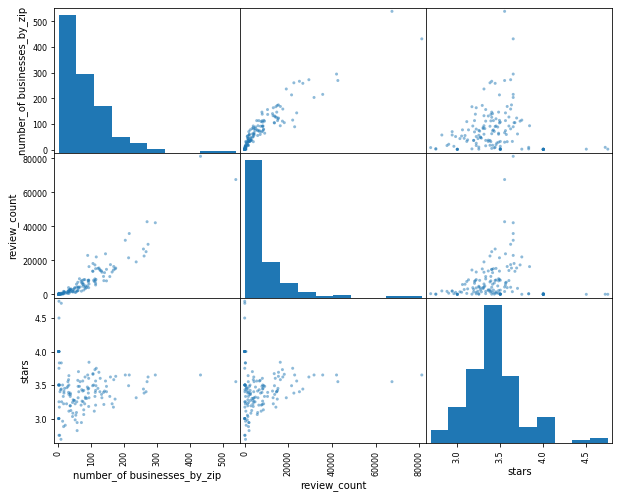

In [47]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(zip[['number_of businesses_by_zip', 'review_count', 'stars']], figsize=(10, 8));

In [48]:
# review count correlates very well to restaurant count by zip
abs(zip.corr()['review_count']).sort_values(ascending=False)

review_count                   1.000000
number_of businesses_by_zip    0.927110
stars                          0.119147
Name: review_count, dtype: float64

In [49]:
# conclusion - the more reviews generated for businesses in a particular zip, the more likely they are to tend towards the mean 

In [50]:
# LATITUDE LONGITUDE

In [51]:
# Do clustering of lat lon
X = business[['latitude', 'longitude', 'review_count']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=1)
km.fit(X)

km.labels_

lat_long_df = business
lat_long_df['lat_lon_cluster'] = km.labels_

km.cluster_centers_

lat_long_df = lat_long_df.groupby('lat_lon_cluster').mean().sort_values('stars')
lat_long_df 

,postal_code,latitude,longitude,stars,review_count,is_open
lat_lon_cluster,,,,,,
5,85182.494307,33.487110,-112.012258,3.227773,14.761767,0.543733
1,85198.269507,33.493197,-112.001084,3.433600,60.682546,0.696880
7,85195.545148,33.486778,-111.986649,3.667453,123.195418,0.780323
4,85194.123735,33.481274,-111.984990,3.746907,200.667042,0.834646
9,85187.285185,33.494422,-111.986615,3.840741,301.211111,0.916667
2,85177.510386,33.482487,-111.979229,3.903561,430.804154,0.946588
0,85174.885057,33.488711,-111.978855,3.951149,613.557471,0.971264
8,85137.320988,33.490487,-111.979438,4.080247,868.456790,0.962963
6,85128.057143,33.494522,-111.966223,4.157143,1257.742857,1.000000


In [52]:
# count the number of rows in each cluster
from collections import Counter, defaultdict
print(Counter(km.labels_))

Counter({5: 5545, 1: 2372, 7: 1484, 4: 889, 9: 540, 2: 337, 0: 174, 8: 81, 6: 35, 3: 16})


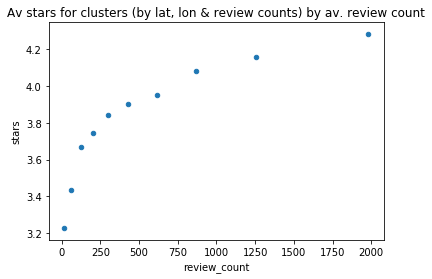

In [53]:
# Plotting average review count per restaurant in a zip against average star rating 
lat_long_df.plot(kind='scatter', x='review_count', y='stars', title = 'Av stars for clusters (by lat, lon & review counts) by av. review count');

In [54]:
# CATEGORIES

In [55]:
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,postal_code_str,lat_lon_cluster
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016.0,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",85016,5


In [56]:
categories_dummies = business['categories'].str.get_dummies(', ').replace(0, '')

In [57]:
categories_dummies.shape

(11473, 520)

In [58]:
categories_df = pd.concat([business, categories_dummies.reindex(categories_dummies.index)], axis=1)
categories_df.shape
categories_df.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Wills,Wine & Spirits,Wine Bars,Wine Tasting Room,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016.0,33.495194,-112.028588,3.0,18,...,,,,,,,,,,


In [59]:
categories_dummies.astype(bool).sum(axis=0).sort_values(ascending=False).head(30)

Restaurants                  11465
Food                          3054
Fast Food                     1955
Mexican                       1778
Sandwiches                    1760
Nightlife                     1706
American (Traditional)        1691
Bars                          1630
Pizza                         1409
American (New)                1316
Burgers                       1198
Breakfast & Brunch            1195
Italian                        901
Coffee & Tea                   704
Chinese                        655
Salad                          614
Chicken Wings                  574
Event Planning & Services      557
Seafood                        491
Cafes                          488
Sports Bars                    486
Delis                          462
Caterers                       377
Bakeries                       360
Japanese                       360
Barbeque                       349
Mediterranean                  345
Specialty Food                 345
Sushi Bars          

In [60]:
categories_df.groupby('Fast Food').stars.mean()

Fast Food
1    2.742455
     3.580164
Name: stars, dtype: float64

In [61]:
# Percentage difference with fast food aggregate star rating
categories_df.groupby('Fast Food').stars.mean()[1] / categories_df.groupby('Fast Food').stars.mean()[''] - 1

-0.23398611918777001

In [62]:
categories_df.groupby('Mexican').stars.mean()

Mexican
1    3.468223
     3.431769
Name: stars, dtype: float64

In [63]:
categories_df.groupby('Cafes').stars.mean()

Cafes
1    3.876025
     3.417934
Name: stars, dtype: float64

In [64]:
categories_df.groupby('Mediterranean').stars.mean()

Mediterranean
1    3.913043
     3.422673
Name: stars, dtype: float64

In [65]:
#ATTRIBUTES

In [66]:
business.shape

(11473, 16)

In [67]:
# drop rows that where the 'attributes' is null and create a new dataframe
business_attributes_not_nan = business[business['attributes'].notna()].reset_index()
business_attributes_not_nan.shape

(11214, 17)

In [68]:
business_attributes_not_nan.head(1)
# column labeled 'index' has been added which is not needed.
# for now we will ignore this rather than delete it

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,postal_code_str,lat_lon_cluster
0,0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016.0,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",85016,5


In [69]:
# Extract json from 'business_attributes_not_nan' as a new dataframe
from pandas.io.json import json_normalize
from ast import literal_eval

def unnest_json(dataframe, column):
    dataframe_new = json_normalize(dataframe[column].apply(literal_eval))
    return dataframe_new

attributes_df = unnest_json(business_attributes_not_nan,'attributes')
# attributes_df.reset_index(level=0)
attributes_df.shape

(11214, 39)

In [70]:
# merge the two new dataframes
attributes_merged = pd.concat([business_attributes_not_nan, attributes_df.reindex(business_attributes_not_nan.index)], axis=1)
attributes_merged.shape

(11214, 56)

In [71]:
# Check out the list of attributes
attributes_merged.isnull().sum()

index                             0
business_id                       0
name                              0
address                         120
city                              0
state                             0
postal_code                      10
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
attributes                        0
categories                        0
hours                          2484
postal_code_str                   0
lat_lon_cluster                   0
RestaurantsTakeOut              747
BusinessParking                1207
WiFi                           2753
RestaurantsDelivery            1037
OutdoorSeating                 1183
RestaurantsAttire              1281
BusinessAcceptsCreditCards      282
RestaurantsGoodForGroups        937
RestaurantsReservations        1049
HasTV                          2090
Ambience                    

In [72]:
# Check out the attribute DogsAllowed as an example attribute
attributes_merged.DogsAllowed.value_counts()

False    524
True     382
None       7
Name: DogsAllowed, dtype: int64

In [73]:
# Look at the star mean for DogsAllowed by element 
attributes_merged.groupby('DogsAllowed').stars.mean()

DogsAllowed
False    3.968511
None     4.214286
True     4.017016
Name: stars, dtype: float64

In [74]:
# create dummies
dogs_allowed_dummies = pd.get_dummies(attributes_merged.DogsAllowed, prefix='dogs_allowed')
dogs_allowed_dummies.drop(dogs_allowed_dummies.columns[0], axis=1, inplace=True)
dogs_allowed_dummies.shape

(11214, 2)

In [75]:
# In the end, for the calcuation I did, I don't need to one hot encode
# Concatenate the most recently created dataframe and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
dogs_allowed_plus_dummies = pd.concat([attributes_merged, dogs_allowed_dummies], axis=1)
dogs_allowed_plus_dummies.shape

(11214, 58)

In [76]:
# as we are looking at nan values
dogs_allowed_no_nan = dogs_allowed_plus_dummies[dogs_allowed_plus_dummies['DogsAllowed'].notnull()]
dogs_allowed_no_nan.shape

(913, 58)

In [77]:
# correlate is_open to review_count using logistical regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LR = LogisticRegression()
feature_cols = ['stars']
X = dogs_allowed_no_nan[feature_cols]
y = dogs_allowed_no_nan.DogsAllowed

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5414847161572053

In [78]:
# Baseline calculation. 
# Logistical reqression performs poorly with the baseline.
dogs_allowed_no_nan.DogsAllowed.value_counts()[0] / len(dogs_allowed_no_nan)

0.5739320920043811

In [79]:
# New Export 

In [80]:
# business_id, name, city, lat, long, stars, is open, postal_code_str, 

In [81]:
# OLD FINAL CLEAN UP OF THE MERGED FILE AND EXPORT

In [82]:
# merged.drop('index', axis = 1, inplace=True)
# merged.head(1)

In [83]:
# Check for zeros as I am going to by using zeros to fill nan values
# Only the feature 'is_open' has zeros. It also has no nan values so there is no ambiguity created here.  
# merged.isin([0]).sum()

In [84]:
# Check for nan values
# merged.isnull().sum()

In [85]:
# Fill nan values with zeros
# merged.fillna(0, inplace=True)
# merged.isnull().sum()

In [86]:
# check data types
# merged.dtypes

In [87]:
# Check final shape of date frame before exporting 
# merged.shape

In [88]:
# export
# merged.to_csv('business_attributes.csv')